In [2]:
import os, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
directory = "/mnt/data-storage/alexlyttle/scalable-stellar-inference"

with open(os.path.join(directory, "divergances.json"), "r") as file:
    s = file.read()
    divergances = json.loads(s)
stars = np.array(list(divergances.keys()), dtype=int)
num_diverging = np.array(list(divergances.values()), dtype=int)

In [4]:
with open(os.path.join(directory, "truths.json"), "r") as file:
    s = file.read()
    truths = {k: np.array(v)[stars] if np.ndim(v) > 0 else v for k, v in json.loads(s).items()}

In [23]:
filename = "truths-nearest-neighbour-clean.csv"
truths = pd.read_csv(os.path.join(directory, filename), index_col=0)
truths = truths.loc[stars].to_dict(orient="list")
truths = {k: np.array(v) for k, v in truths.items()}

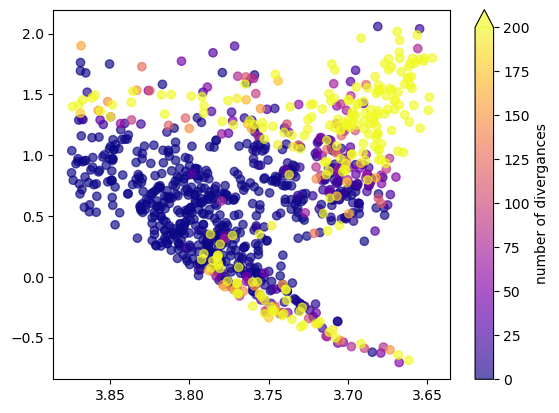

In [24]:
fig, ax = plt.subplots()

sorted_stars = np.argsort(num_diverging)

s = ax.scatter(truths["log_Teff"][sorted_stars], truths["log_L"][sorted_stars], c=num_diverging[sorted_stars], alpha=0.66, vmax=200, cmap="plasma")

ax.invert_xaxis()
fig.colorbar(s, label="number of divergances", extend="max");

In [25]:
sorted_stars[-10:]

array([731,  94,  67, 404, 951, 298, 209, 517, 723, 390])

In [33]:
10**truths["log_Dnu"].max() * 0.005

1.0128147181534934

In [35]:
10**truths["log_Dnu"].max()

202.5629436306987

In [49]:
0.015 * truths["Teff"].max()

112.30417157355488

In [50]:
0.015 * truths["Teff"].min()

66.52065242077504

In [63]:
0.015 * truths["L"].max()

1.7181188075546354

In [58]:
0.015 * truths["Dnu"].max()

3.0384441544604828

In [61]:
0.015 * 140

2.1

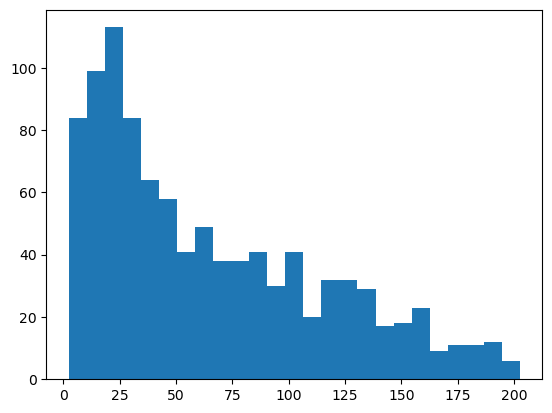

In [65]:
plt.hist(truths["Dnu"], bins=25);

In [67]:
0.01 * 50

0.5